In [17]:
from google.colab import files  # Skip this in Jupyter Notebook

uploaded = files.upload()  # You will be prompted to upload the files


Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (2).csv
Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [19]:
# Load training data
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_prices = train_data[['Open']].values

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_prices)

In [21]:
# Create training sequences
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [23]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 0.1116
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0075
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0062
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0055
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0053
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0048
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0052
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0047
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0045
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0042
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0041
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0047
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0038
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0053
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - l

In [26]:
# Load test data
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_prices = test_data[['Open']].values

In [27]:
# Combine data for input to LSTM
total_data = pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs = total_data[-(len(test_data) + 60):].values.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

In [28]:
# Create test sequences
X_test = []
for i in range(60, 60 + len(test_data)):
    X_test.append(inputs_scaled[i-60:i])
X_test = np.array(X_test).reshape(len(test_data), 60, 1)


In [29]:
# Predict prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


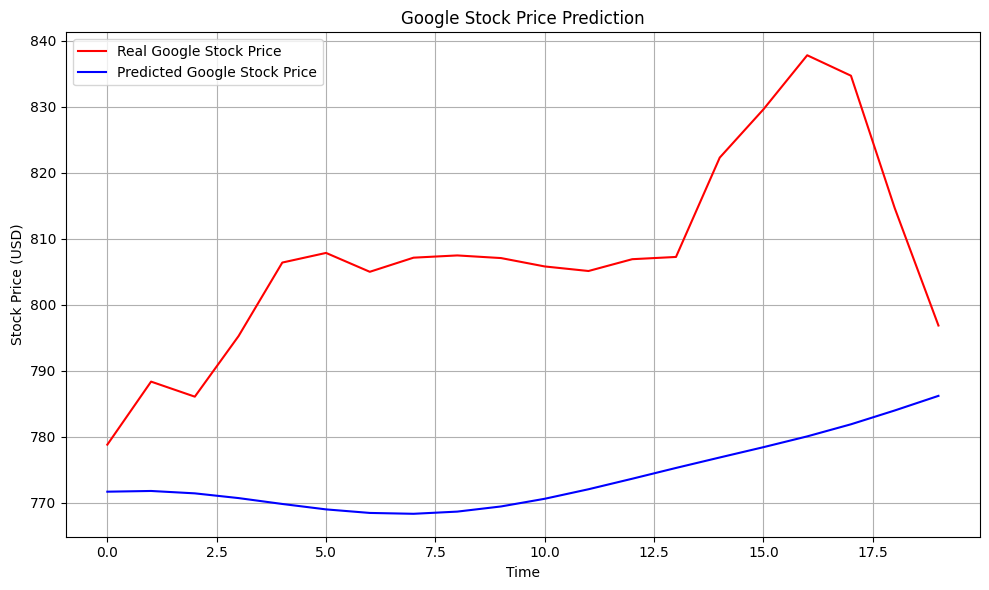

In [30]:
# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(real_prices, color='red', label='Real Google Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()